In [10]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [17]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

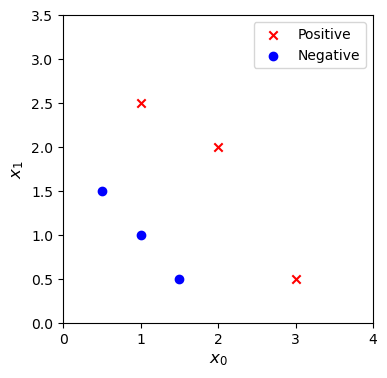

In [20]:

def plot_data(X, y, ax):
    """
    Plots the data points X and y by plotting the positive and negative examples

    Parameters
    -----------
    X: array-like
        The feature matrix of the dataset

    y: array-like
        The target labels of the dataset

    ax : matplotlib.axes.Axes

    """
    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos][:, 0], X[pos][:, 1], marker='x', c='r', label='Positive')
    ax.scatter(X[neg][:, 0], X[neg][:, 1], marker='o', c='b', label='Negative')

    ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

In [26]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    -----------
    z : array-like
        A scalar or numpy array of any size
    
    Returns
    --------

    g : array-like
        The sigmoid of z
    """
    z = np.clip(z, -500, 500)
    g = 1 / (1 + np.exp(-z))
    return g

def compute_cost_logistic(X_train, y_train, w, b):
    m = X_train.shape[0]
    cost_sum = 0
    for i in range(m):
        z = np.dot(X_train[i],w) + b
        f_wb_i = sigmoid(z)
        cost_sum += -y_train[i] * np.log(f_wb_i) - (1 - y_train[i]) * np.log(1 - f_wb_i) 

    return cost_sum / m

w = np.array([1, 1])
b = -3
print(compute_cost_logistic(X_train, y_train, w, b))

0.36686678640551745


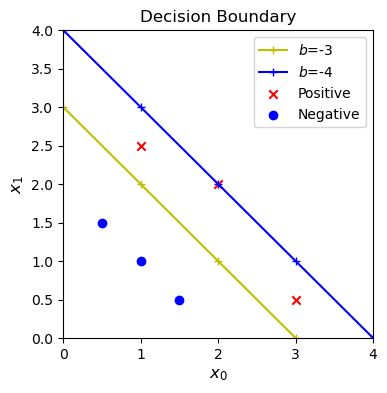

In [30]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, marker='+', c='y', label="$b$=-3")
ax.plot(x0,x1_other, marker='+', c='b', label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()